<a id="1"></a>
# <p style="padding:10px;background-color:#686868;margin:0;color:#c6b9be;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">SALES PREDICTION</p>

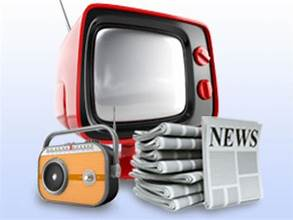

<a id="1"></a>  
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Import Dataset</p>

In [2]:
df=pd.read_csv(r'advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">DATA VISUALIZATION</p> 

<a id="1"></a>  
### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">Histogram</p>  

Text(0, 0.5, 'Sales')

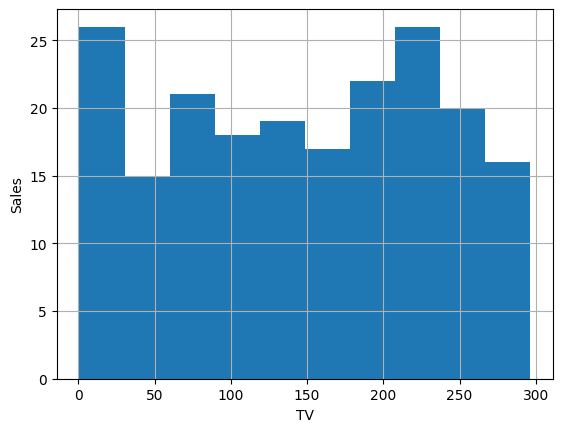

In [6]:
df['TV'].hist()
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

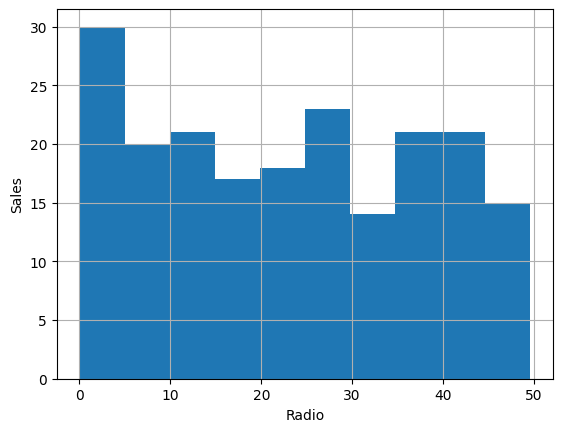

In [7]:
df['Radio'].hist()
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

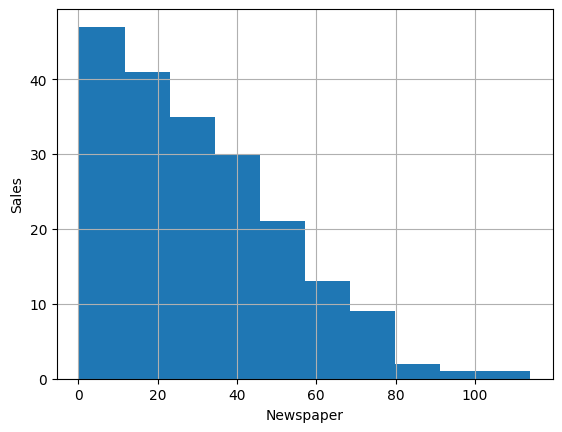

In [8]:
df['Newspaper'].hist()
plt.xlabel('Newspaper')
plt.ylabel('Sales')

<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">ScatterPlot</p>  

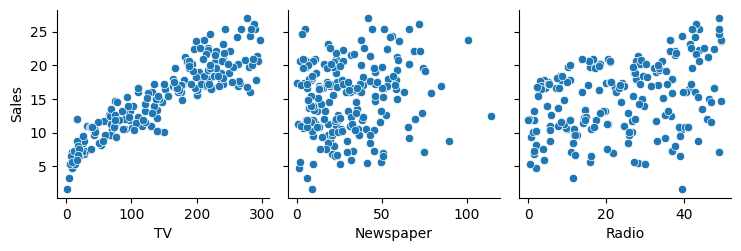

In [9]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">BarPlot</p>   

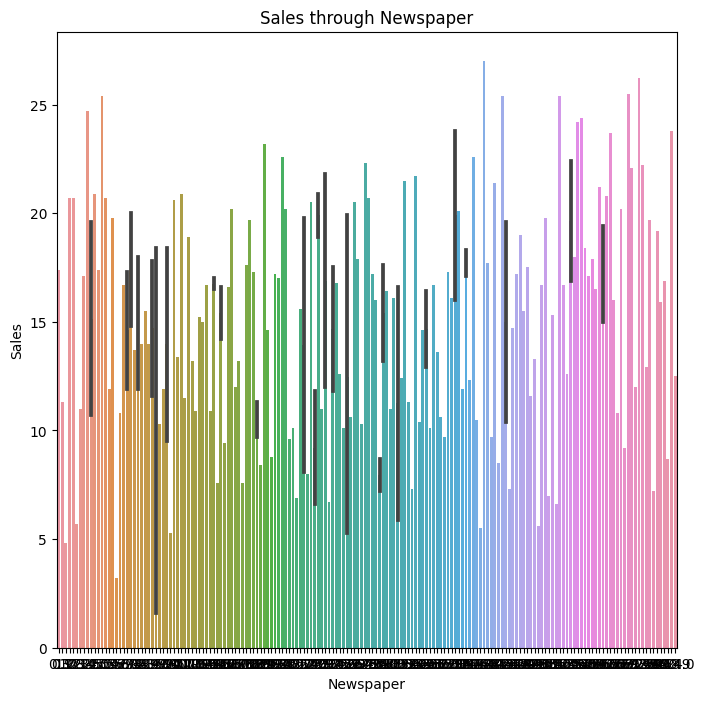

In [10]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Newspaper', y='Sales', data=df)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Sales through Newspaper')
plt.show()

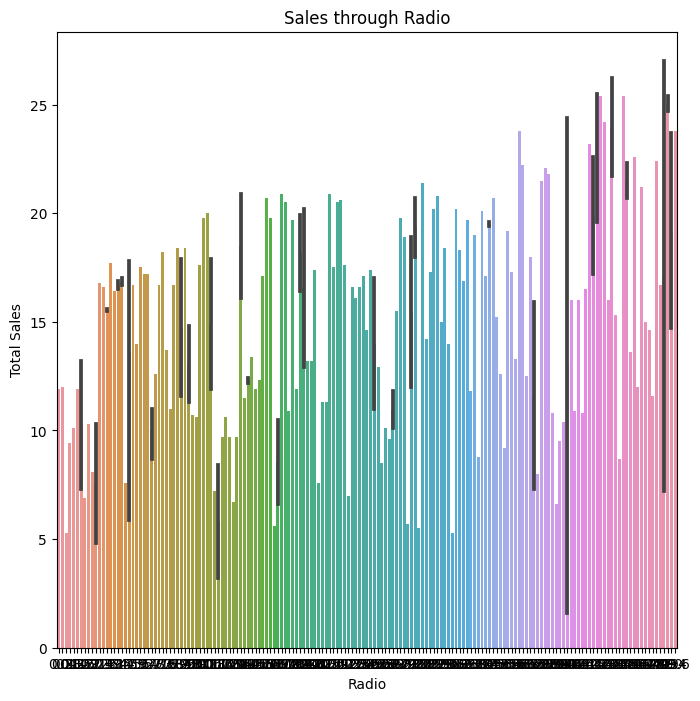

In [11]:
plt.figure(figsize=(8,8))
sns.barplot(x='Radio', y='Sales', data=df)
plt.xlabel('Radio')
plt.ylabel('Total Sales')
plt.title('Sales through Radio')
plt.show()

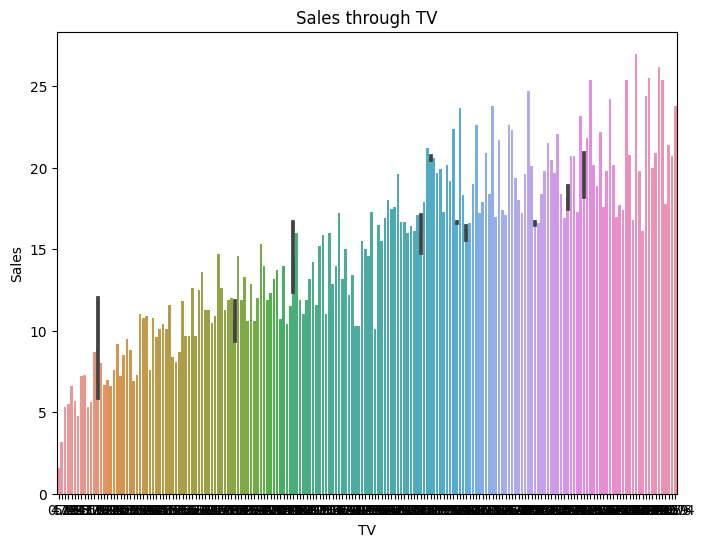

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x='TV', y='Sales', data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales through TV')
plt.show()

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p> 

### Separation of X & Y

In [14]:
x=df.iloc[:,:-1]
y=df['Sales']

In [15]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# Spliting the data into Xtrain & Xtest

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
print(x.shape,xtrain.shape,xtest.shape)

(200, 3) (140, 3) (60, 3)


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">LinearRegression</p>   

In [20]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)
train=LR.score(xtrain,ytrain)
test=LR.score(xtest,ytest)
print("Train Accuracy:",round(train,3))
print("Test Accuracy:",round(test,2))

Train Accuracy: 0.899
Test Accuracy: 0.91


<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">DecisionTreeRegression</p>   

In [21]:
DT=DecisionTreeRegressor()
DT=DT.fit(xtrain,ytrain)
ypred=DT.predict(xtest)
train1=DT.score(xtrain,ytrain)
test1=DT.score(xtest,ytest)
print("Train Accuracy:",round(train1,3))
print("Test Accuracy:",round(test1,2))

Train Accuracy: 1.0
Test Accuracy: 0.91


<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">RandomForestRegressor</p>    

In [22]:
RF = RandomForestRegressor()
RF.fit(xtrain,ytrain)
ypred1=RF.predict(xtest)
train2=RF.score(xtrain,ytrain)
test2=RF.score(xtest,ytest)
print("Train Accuracy:",round(train2,3))
print("Test Accuracy:",round(test2,2))

Train Accuracy: 0.991
Test Accuracy: 0.96


<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200"> Support Vector Machine</p>  

In [23]:
SVM = SVR()
SVM.fit(xtrain,ytrain)
ypred1=SVM.predict(xtest)
train3=SVM.score(xtrain,ytrain)
test3=SVM.score(xtest,ytest)
print("Train Accuracy:",round(train3,3))
print("Test Accuracy:",round(test3,2))

Train Accuracy: 0.864
Test Accuracy: 0.88


In [24]:
DF=pd.DataFrame({'Model':('LinearRegression', 'DecisionTree','RandomForestRegressor','SVM'),'Accuracy':(test, test1, test2, test3)})
DF
DF.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,RandomForestRegressor,0.963043
1,DecisionTree,0.909165
0,LinearRegression,0.907115
3,SVM,0.878500


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conculsion: - The order of the ✅Best Models from top to bottom:  RandomForestRegressor</p>  